In [95]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline 

Набор данных: Вероятность сердечного приступа

In [96]:
data = pd.read_csv("datasets_737503_1278636_heart.csv", sep=",")
data.shape
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility/data

1. age: возраст в годах
2. sex: пол (1 = мужчина; 0 = женщина)
3. cp: тип боли в груди
    - Значение 0: типичная стенокардия
    - Значение 1: атипичная стенокардия
    - Значение 2: неангинальная боль
    - Значение 3: бессимптомное
4. trestbps: верхнее артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
5. холестерин: в сыворотке холестерин в мг/дл
6. fbs: (уровень глюкозы в крови натощак > 120 мг/дл) (1 = истина; 0 = ложь)
7. restecg: результаты электрокардиографии в состоянии покоя
    - Значение 0: нормальное
    - Значение 1: аномалия волны ST-T (инверсия зубца T и / или повышение или депрессия ST> 0,05 мВ)
    - Значение 2: показ вероятной или определенной гипертрофии левого желудочка по критериям Эстеса
8. thalach: максимальная частота сердечных сокращений во время пробы 
9. exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
10. oldpeak = депрессия ST, вызванная физическими упражнениями относительно отдыха
11. slope: наклон ST-сегмента
    - значение 0: наклон вверх
    - значение 1: ровно
    - значение 2: наклон вниз
12. ca: количество крупных сосудов (0-3), окрашенных с помощью флуороскопии
13. thal: 0 = нормальный; 1 = исправленный дефект; 2 = обратимый дефект
14. target: 0 = маленькая вероятность сердечного приступа, 1 = большая вероятность того, что это сердечный приступ

In [97]:
data.shape

(303, 14)

In [98]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [99]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <a list of 10 Patch objects>)

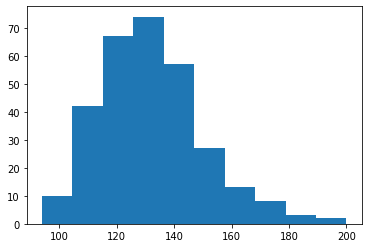

In [100]:
# давление
plt.hist(data['trestbps'], bins=10)

(array([143.,   0.,   0.,  50.,   0.,   0.,  87.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

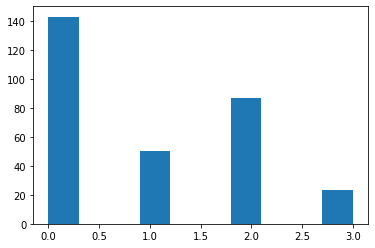

In [101]:
# холестерин
plt.hist(data['cp'], bins=10)

(array([143.,   0.,  50.,   0.,   0.,  87.,   0.,  23.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ]),
 <a list of 8 Patch objects>)

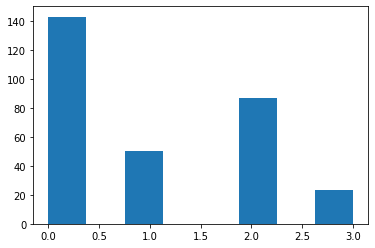

In [102]:
# тип боли
plt.hist(data['cp'], bins=8)  

(array([ 96.,   0.,   0., 207.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

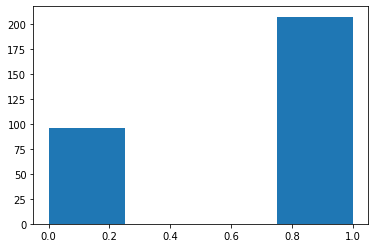

In [103]:
plt.hist(data['sex'], bins=4) 

(array([258.,   0.,   0.,  45.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

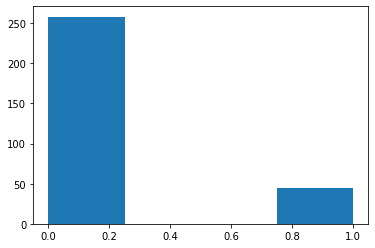

In [104]:
# глюкоза
plt.hist(data['fbs'], bins=4) 

(array([147.,   0.,   0., 152.,   0.,   4.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        ]),
 <a list of 6 Patch objects>)

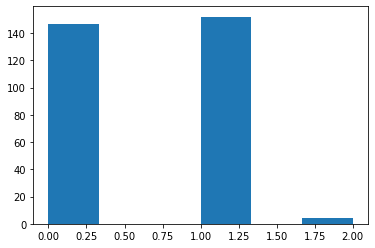

In [105]:
# ЭКГ данные
plt.hist(data['restecg'], bins=6) 

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

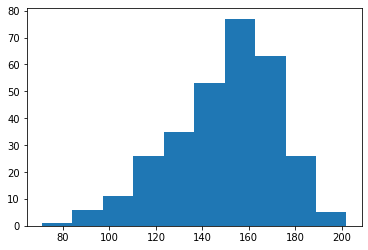

In [106]:
# ЧСС
plt.hist(data['thalach'], bins=10) 

(array([ 21.,   0.,   0., 140.,   0., 142.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        ]),
 <a list of 6 Patch objects>)

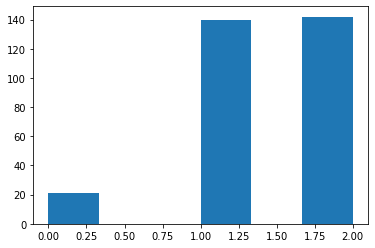

In [107]:
# наклон ST
plt.hist(data['slope'], bins=6) 

(array([175.,   0.,  65.,   0.,  38.,   0.,  20.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 8 Patch objects>)

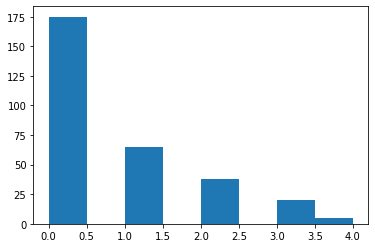

In [108]:
# количество крупных сосудов (0-3), окрашенных с помощью флуороскопии
plt.hist(data['ca'], bins=8) 

(array([138.,   0.,   0., 165.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <a list of 4 Patch objects>)

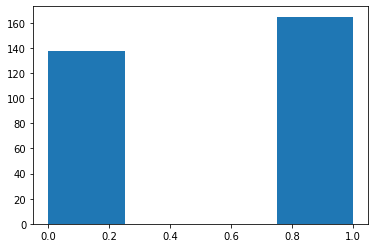

In [109]:
plt.hist(data['target'], bins=4) 

In [110]:
data[['trestbps', 'chol', 'target']].corr()

,trestbps,chol,target
trestbps,1.000000,0.123174,-0.144931
chol,0.123174,1.000000,-0.085239
target,-0.144931,-0.085239,1.000000


In [118]:
data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']].corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,0.222682,0.210244,-0.430696


Прогноз сердечной недостаточности

In [119]:
data = pd.read_csv("datasets_727551_1263738_heart_failure_clinical_records_dataset.csv", sep=",")
data.shape
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [120]:
1. age - возраст
2. anaemia - анемия
3. creatinine_phosphokinase - Уровень фермента СРК (креатинкиназа) в крови (мкг / л)
4. diabetes - сахарный диабет
5. ejection_fraction - фракция выброса в %
6. high_blood_pressure - повышенное артериальное давление
7. platelets - тромбоциты
8. serum_creatinine - уровень сывороточного креатинина в крови (мг / дл)
9. serum_sodium - Уровень сывороточного натрия в крови (мг-экв / л)
10. sex - пол (0 - женщины, 1 - мужчины)
11.smoking - курение
12.time - период наблюдения (дни)
13.DEATH_EVENT - факт смерти в период наблюдения (в среднем 130 дней)

SyntaxError: invalid syntax (<ipython-input-120-2646648967e7>, line 1)

(array([ 5., 18., 70., 49., 77., 20., 21.,  3., 33.,  1.,  1.,  1.]),
 array([14. , 19.5, 25. , 30.5, 36. , 41.5, 47. , 52.5, 58. , 63.5, 69. ,
        74.5, 80. ]),
 <a list of 12 Patch objects>)

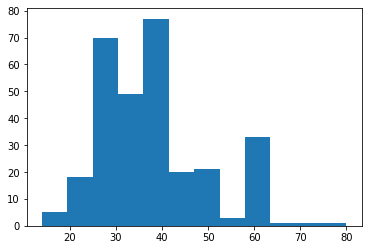

In [121]:
plt.hist(data['ejection_fraction'], bins=12) 

(array([198.,  66.,  18.,   5.,   5.,   1.,   1.,   2.,   1.,   0.,   0.,
          2.]),
 array([0.5       , 1.24166667, 1.98333333, 2.725     , 3.46666667,
        4.20833333, 4.95      , 5.69166667, 6.43333333, 7.175     ,
        7.91666667, 8.65833333, 9.4       ]),
 <a list of 12 Patch objects>)

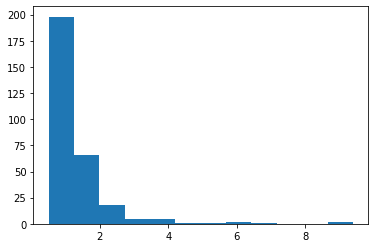

In [122]:
plt.hist(data['serum_creatinine'], bins=12) 

(array([18., 29., 46., 32., 48., 41., 40., 15., 13.,  9.,  5.,  3.]),
 array([40.        , 44.58333333, 49.16666667, 53.75      , 58.33333333,
        62.91666667, 67.5       , 72.08333333, 76.66666667, 81.25      ,
        85.83333333, 90.41666667, 95.        ]),
 <a list of 12 Patch objects>)

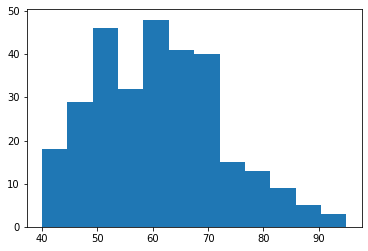

In [123]:
plt.hist(data['age'], bins=12) 

In [126]:
data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']].corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316
